In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', {"axes.linewidth": "1",'axes.yaxis.grid':False})

In [2]:
import sys
PATH_ = '/om/user/rishir/lib/MentalPong/behavior/'
sys.path.insert(0, PATH_)

from rnn_analysis import utils
import numpy as np
import pickle as pk
import pandas as pd
import BehavioralCharacterizer as BC

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
figoutpath = '/om/user/rishir/figs/mpong/hum_monk/'

In [5]:
fns = [
'monkey_CP_pong_basic'
]
datapath = '/om/user/rishir/data/behavior/'
data = {}
for fn in fns:
    fn_full = '%s/%s.pkl' % (datapath, fn)
    dat = pk.load(open(fn_full, 'rb'))
    df = dat.datasets[0]['scalar'].query('ignore == 0 & occ_alpha == 1').reset_index(drop=True)
    df['session_date'] = df['session_date'].astype(int)
    days = sorted(list(np.unique(df['session_date'])))
    df['session_index'] = np.array([days.index(i) for i in df['session_date']])
    data[fn] = df
    
# fill dataset column when it was leftout
df = data['monkey_CP_pong_basic']
t = np.isnan(df['dataset_idx'])
df['dataset_idx'][t] = 0

/home/rishir/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
fns = [
'perle_pong_basic_learning',
'perle_pong_basic_generalization',
'perle_pong_basic',
'carmen_pong_basic_learning',
'carmen_pong_basic_generalization',
'carmen_pong_basic',
'human_pong_basic',
'monkey_CP_pong_basic',
      ]
datapath = '/om/user/rishir/data/behavior/'
data_dict = {'ignore == 0 & occ_alpha == 1': {},
             'ignore == 0 & occ_alpha != 1':{}
            }
for fn in fns:
    fn_full = '%s/%s.pkl' % (datapath, fn)
    dat = pk.load(open(fn_full, 'rb'))
    for dfn in data_dict.keys():
        df = dat.datasets[0]['scalar'].query(dfn).reset_index(drop=True)
        df['session_date'] = df['session_date'].astype(int)
        days = sorted(list(np.unique(df['session_date'])))
        df['session_index'] = np.array([days.index(i) for i in df['session_date']])
        data_dict[dfn][fn] = df

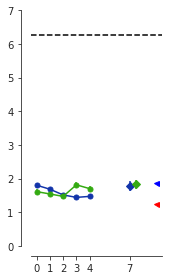

In [7]:
f,ax = plt.subplots(figsize=(2.5,4))

plot_var = 'paddle_error'
cols =  ['#1234aa', '#34aa12']
learning_data = ['perle_pong_basic_learning','carmen_pong_basic_learning']
generalization_data = ['perle_pong_basic_generalization', 'carmen_pong_basic_generalization']
steady_state_data = ['perle_pong_basic', 'carmen_pong_basic']
human_data = ['human_pong_basic']
null_error_f_mae = 6.272538362653939 # just copied over from notebook RNN2Primates

for dfi, dfk in enumerate(['ignore == 0 & occ_alpha == 1']):
    data = data_dict[dfk].copy()
    training_conditions = np.unique(data['carmen_pong_basic_learning']['py_meta_index'])
    alpha = 1.0
    for fni,fn in enumerate(learning_data):
        g = data[fn].query('session_index<5').groupby('session_index')[plot_var]
        ax.errorbar(g.mean().index, g.mean(), yerr=g.sem(), 
                    fmt='-o', color=cols[fni], markersize=5, alpha=alpha)

    x_offset_1 = 7
    for fni, fn in enumerate(generalization_data):
        df2 = data[fn].groupby('py_meta_index').head(1)
        t = df2['py_meta_index'].isin(training_conditions) == False
        df2 = df2[t]
        g = df2[plot_var]
        ax.errorbar(x_offset_1+fni*0.5, g.mean(), yerr=g.sem(), fmt='D',
                    color=cols[fni], markersize=5, alpha=alpha)
    
    x_offset_2 = 9
    for fn, col in zip(['human_pong_basic', 'monkey_CP_pong_basic'], ['r', 'b']):
        df2 = data[fn].groupby('py_meta_index').head(1)
        g = df2[plot_var]
        ax.plot(x_offset_2, g.mean(), marker='<', color=col, markersize=5)
    ax.axhline(null_error_f_mae, ls='--', color='k')
    ax.set_ylim([0,7])
    ax.set_xticks([0,1,2,3,4,x_offset_1])
    sns.despine(ax=ax, offset=10, trim=False)
plt.tight_layout()
f.savefig('%s/monkey_learning_new.pdf' % figoutpath)
    
